In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings

from helper import visualization
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
from IPython.core.pylabtools import figsize
figsize(15, 7)

In [3]:
import warnings
warnings.filterwarnings('ignore')

<img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/thanos_dl.jpg?raw=true">

# CPSC: 370 Deep Learning with Keras

* This class is about deep learning
* Keras is one *tool* we will use

# Class Overview
* 5 Homeworks (20%)
* Midterm (40%)
* Class Project (40%)

# "There's no such thing as a stupid question"

* Except
    * Bugs in code

* "Will this be on the test?"

A story goes that a Cambridge tutor in the mid-19th century once proclaimed: *"I’m teaching the smartest boy in Britain."*  
His colleague retorted: *"I’m teaching the best test-taker."*  
The first boy was James Clerk Maxwell. The second boy,
who indeed scored highest on the Tripos, is long forgotten

# Review
* Machine Learning
    * Supervised/unsupervised
* Linear Regression
    * Gradient Descent 
* Perceptrons
    * Delta Rule
* Multi Layer Perceptrons
    * Backpropogation
* Neural Networks
    * Activation functions
    * Gradient Descent

# Map of Machine Learning
![Alt text](https://i.pinimg.com/originals/6e/9b/dd/6e9bdde9d485fe2476738ab1733e8d49.png)

# Train-Test Split
Training

* Train our model
* 70% of the data

Validation

* Check model performance during training
    * Don't learn on this data!
    * 20% of the data

Testing

* Test once training is finished
    * Don't learn on this data!
    * 10% of the data

# Terminology
<img src="https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png" width="650">

# Linear Regression
* $N$ data points, each with $d$ features
* Corresponding number of targets

\begin{align}
    X &= \begin{bmatrix}
       x_{11} & ... & x_{1d} \\
       x_{21} & ... & x_{2d}\\
       \vdots & \vdots & \vdots \\
       x_{n1} & ... & x_{nd}
     \end{bmatrix} 
    &
    Y &= \begin{bmatrix}
       y_{1} \\
       y_{2} \\
       \vdots \\
       y_{n}
     \end{bmatrix}
   \end{align}

* Train a model (classifier, predictor) to learn the target (output, true label) for the data
* **INPUT:** Data, $X^{n\times d}$, labels $Y^{n \times c}$
* **OUTPUT:** Model(x): $\xrightarrow{}$ y

# Linear Regression Model
* What do we want to minimize?

* Mean Squared error
\begin{equation}
    J(\theta) = \frac{1}{2} (Y - \hat{Y})^2
\end{equation}

$\theta$: Parameters, coefficients, or weights of the model  
$Y$: True target value for input $X$  
$\hat{Y} = X\theta$: Prediction from the model  
$J(\theta)$: Cost function in terms of $\theta$. We say *"in terms of"* because $J$ is a function of $\theta$ (i.e. as $\theta$ changes, $J$ changes)  
You may also see this. They're equivilant
\begin{equation}
    J(\theta) = \frac{1}{2N} (Y - \hat{Y})^2
\end{equation}

# Training a Linear Regression Model
* Closed form

\begin{equation}
    \theta = (X^T X)^{-1} X^T Y
\end{equation}

\begin{equation}
   \hat{Y} = X\theta
\end{equation}

\begin{equation}
   J(\theta) = \frac{1}{2} (Y - \hat{Y})^2
\end{equation}

\begin{equation}
   J(\theta) = \frac{1}{2} (Y - X\theta)^2
\end{equation}

\begin{equation}
   J(\theta) = \frac{1}{2} (Y - X\theta)^T(Y - X\theta)
\end{equation}


\begin{equation}
   \frac{\partial}{\partial\theta}J(\theta) = \frac{\partial}{\partial\theta} (Y - X\theta)^T(Y - X\theta)
\end{equation}

\begin{equation}
   \frac{\partial}{\partial\theta}J(\theta) = \frac{\partial}{\partial\theta} (Y^T Y - \theta^T X^T X \theta - 2Y^T X \theta )
\end{equation}

**Matrix Calculus Rules**
\begin{equation}
   \frac{\partial \theta^T A\theta}{\partial\theta} = 2A^T \theta
   \hspace{10mm}
   \frac{\partial A\theta}{\partial\theta} = A^T
\end{equation}

\begin{equation}
   \frac{\partial}{\partial\theta}J(\theta) = 0 - 2X^T X \theta - 2 X^T Y 
\end{equation}

\begin{equation}
   \frac{\partial}{\partial\theta}J(\theta) = 0 - 2X^T X \theta - 2 X^T Y 
\end{equation}

\begin{equation}
   2X^T X \theta = 2 X^T Y 
\end{equation}

\begin{equation}
   \theta = (X^T X)^{-1} X^T Y 
\end{equation}

* Iterative Solution
    * Look at the error for a single sample 
    
\begin{equation}
   \nabla_{\theta}J(\theta) = \frac{1}{2N}\sum_{i=1}^{N} \nabla_{\theta} (y_{i} - x_{i}\theta)^2
\end{equation}

\begin{align}
\nabla_{\theta}J(\theta) &= \begin{bmatrix}
   \frac{\partial J(\theta)}{\partial \theta_{0}} \\
   \frac{\partial J(\theta)}{\partial \theta_{1}} \\
   \vdots \\
   \frac{\partial J(\theta)}{\partial \theta_{d}}
 \end{bmatrix}
\end{align}

\begin{equation}
   \nabla_{\theta} (y_{i} - x_{i}\theta)^2 = - 2(y_{i} - x_{i}\theta)x_{i}
\end{equation}

# Gradient Descent Algorithm
**Input:** Training data $X,Y$, learning rate $\alpha$  
**Output:** Model parameters $\theta$  

* Init weights, $\theta$  
* For epoch in Epochs
    * For x,y in X,Y  

    \begin{equation}
        J(\theta)\gets J(\theta) + \frac{1}{2N} (y_{i} - x_{i}\theta)^2
    \end{equation}
    * $\theta \gets \theta - \alpha \nabla_{\theta} J(\theta)$ 

# Gradient Descent 1D  

![](https://github.com/jordanott/DeepLearning/blob/master/Figures/gradient_descent_1d.png?raw=true)

# Gradient Descent 2D

![](https://github.com/jordanott/DeepLearning/blob/master/Figures/gradient_descent_2d.png?raw=true)

The code for the above visuals can be found [here](https://github.com/jordanott/CPSC392/blob/master/Notebooks/Linear%20Regression.ipynb)

# Regularization
![](https://wendysbistudynotes.files.wordpress.com/2018/06/overfitting2.jpg)

# Why Regularization
* Reduce the chance that our model overfits
* Increase generalizability

\begin{equation}
   J(\theta) = \frac{1}{2N} \sum_{i=1}^{N}(y_{i} - x_{i}\theta)^2 + \text{Penalty}  
\end{equation}

# L-Norm
\begin{equation}
   ||\theta||_p = (\sum_{i=0}^{d} |\theta_i|^p)^{\frac{1}{p}}
\end{equation}

\begin{equation}
   ||\theta||_2 = (\sum_{i=0}^{d} |\theta_i|^2)^{\frac{1}{2}} = \sqrt{\theta_0^2 + ... + \theta_d^2}
\end{equation}

# L2 Norm
* Penalize large weights even more $||\theta_{j}||_2^2$ 
* How much we care about the penalty, $\lambda$ 

\begin{equation}
    J(\theta) = \frac{1}{2N} \sum_{i=1}^{N}(y_{i} - x_{i}\theta)^2 + \lambda \sum_{j=0}^{d} \theta_{j}^2  
\end{equation}

* "Shrink" parameters towards zero 
* Ridge Regression

# L1 (Lasso) vs L2 (Ridge)
![](https://cdn-images-1.medium.com/max/1580/1*o6H_R3Do1zpch-3MZk_fjQ.png)

# Perceptrons
![](https://appliedgo.net/media/perceptron/neuron.png)

# Perceptrons
* Standard linear regression

\begin{equation}
    \hat{y} = \sum_{i=0}^{d} x_{i} \theta_{i}
\end{equation}

\begin{equation}
    \hat{y} = T(\sum_{i=0}^{d} x_{i} \theta_{i})
\end{equation}
\begin{equation}
    T(z) = \begin{cases}
    1 & z > threshold  \\
    0 & otherwise
    \end{cases}
\end{equation}

# Boolean Functions (OR)

In [4]:
df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


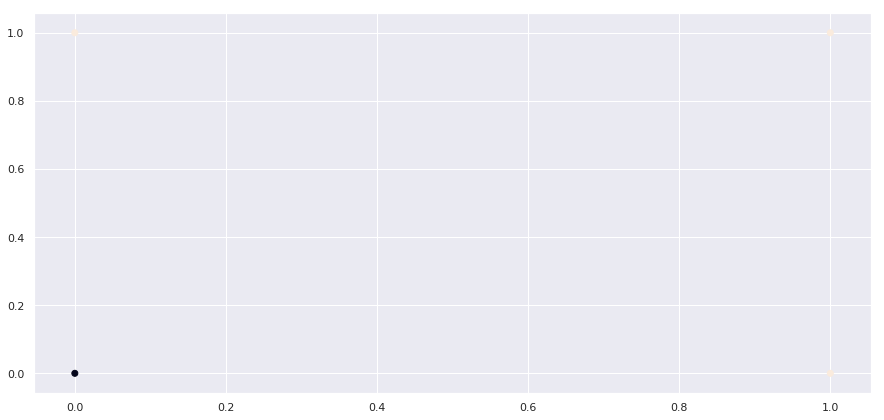

In [5]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

# Perceptron
\begin{equation}
    \hat{y} = T(\sum_{i=0}^{d} x_{i} \theta_{i})
\end{equation}
\begin{equation}
    T(z) = \begin{cases}
    1 & z > threshold  \\
    0 & otherwise
    \end{cases}
\end{equation}

In [6]:
theta = np.random.normal(size=(2,1)) # randomly pick values for theta
x = df[['x1','x2']].values           # inputs are x1 & x2

np.dot(x, theta) > 0                 # linear combination of x & theta; threshold function

array([[False],
       [ True],
       [ True],
       [ True]])

# Decision Boundary

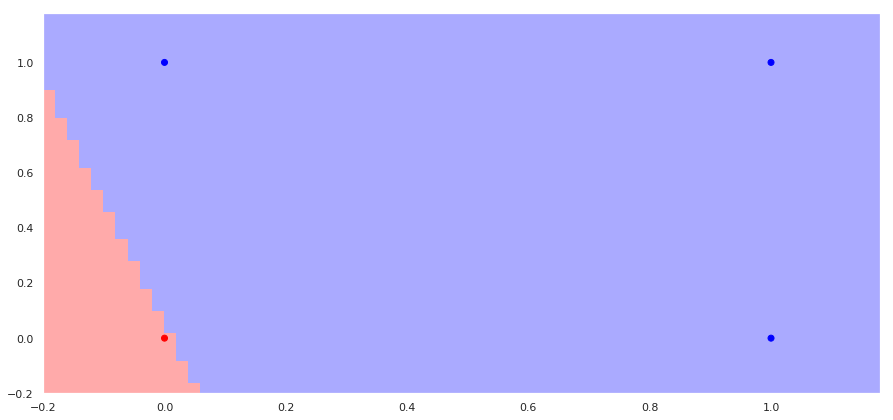

In [7]:
visualization.plot_decision_boundary(df, theta)

# Step Function
![](https://qph.fs.quoracdn.net/main-qimg-d223b378c4b7b3edcb4d4f61607f6bca.webp)

# Perceptron Graph Model
![](http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png)

# AND

* Find the weights of a perceptron that satisfy AND

| $X_1$ | $X_2$ | Y |
| ----- |:-----:| -----:|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

# Delta Rule
* Goal: Update $\theta$ to minimize error
* $\Delta \theta$: small change in $\theta$, "weight update"

\begin{equation}
    \theta = \theta - \Delta \theta
\end{equation}

\begin{equation}
    J(\theta) = \frac{1}{2}\sum_{i=1}^{N} (y_{i} - X_{i}\theta)^2 
\end{equation}

$\alpha$: learning rate

\begin{equation}
    \Delta \theta = - \alpha \sum_{i=1}^{N} (y_{i} - X_{i}\theta ) X_{i}
\end{equation}

What does this look like that we've seen before?

\begin{equation}
    \Delta \theta = \alpha \frac{\partial J(\theta)}{\partial \theta} = \alpha \frac{\partial J(\theta)}{\partial \delta} \frac{\partial \delta}{\partial \theta}
\end{equation}

# XOR

* Find the weights of a perceptron that satisfy XOR

| $X_1$ | $X_2$ | Y |
| ----- |:-----:| -----:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

* Not **linearly seperable**

![](https://img.itch.zone/aW1nLzEzNzk2MzQuanBn/original/b02c5u.jpg)

# Multi Layer Perceptrons

\begin{align}
    \theta^{(1)} &= \begin{bmatrix}
       \theta^{(1)}_{01} & ... & \theta^{(1)}_{0h} \\
       \theta^{(1)}_{11} & ... & \theta^{(1)}_{1h}\\
       \vdots & \vdots & \vdots \\
       \theta^{(1)}_{d1} & ... & \theta^{(1)}_{dh}
     \end{bmatrix} 
     \hspace{20mm}
     \theta^{(2)} &= \begin{bmatrix}
       \theta^{(2)}_{01} & ... & \theta^{(2)}_{0c} \\
       \theta^{(2)}_{11} & ... & \theta^{(2)}_{1c}\\
       \vdots & \vdots & \vdots \\
       \theta^{(2)}_{h1} & ... & \theta^{(2)}_{hc}
     \end{bmatrix}
 \end{align}

* Draw the multilayer perceptron formed by:

\begin{equation}
    \hat{Y} = T(T(X\theta^{(1)})\theta^{(2)})
\end{equation}

# Hidden Nodes

\begin{equation}
    z_{j} = T(\sum_{i=0}^{d}x_{i}\theta^{(1)}_{ij})
\end{equation}

# Output Nodes
\begin{equation}
    \hat{Y}_j = T(\sum_{i=0}^{h}z_{i}\theta^{(2)}_{ij})
\end{equation}

# Deep Neural Networks

* Instead of a threshold function, $T$, we use a nonlinear function, $\phi$
* $\phi$: Activation function

\begin{equation}
    \hat{Y} = \phi_2(\phi_1(X\theta^{(1)})\theta^{(2)})
\end{equation}

In [8]:
num_hidden_nodes = 5; num_output_nodes = 3
x = np.random.randn(100,20)

theta_1 = np.random.randn(20,num_hidden_nodes)
theta_2 = np.random.randn(num_hidden_nodes, num_output_nodes)

def phi(z): return z

# Hidden Nodes

\begin{equation}
    z_{j} = \phi_1(\sum_{i=0}^{d}x_{i}\theta^{(1)}_{ij})
\end{equation}

In [9]:
z = phi(np.matmul(x, theta_1))

In [10]:
z.shape

(100, 5)

# Output Nodes
\begin{equation}
    \hat{Y}_j = \phi_2(\sum_{i=0}^{h}z_{i}\theta^{(2)}_{ij})
\end{equation}

In [11]:
y_hat = phi(np.matmul(z, theta_2))

In [12]:
y_hat.shape

(100, 3)

# Activation Functions (Sigmoid)

* Squashes numbers to range [0,1]
* Historically popular because of relation to biology 

\begin{equation}
    \phi (z) = \frac{1}{1+e^{-z}}
\end{equation}

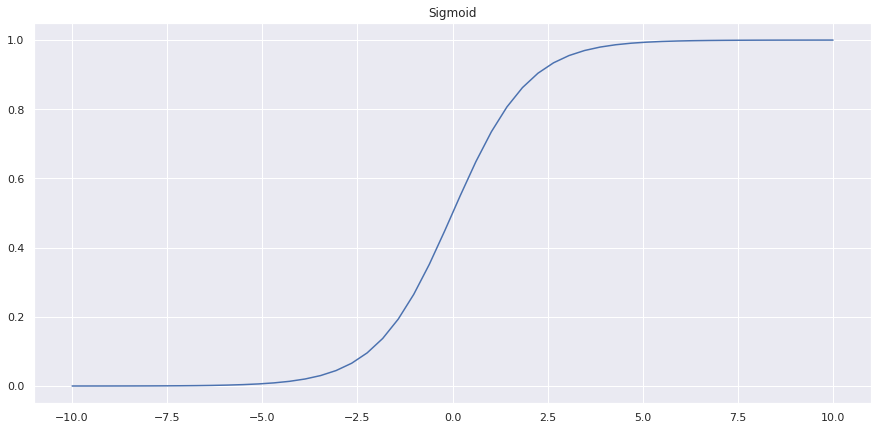

In [13]:
x = np.linspace(-10, 10); y = 1 / (1 + np.exp(-x))
plt.plot(x,y); plt.title('Sigmoid'); plt.show()

1. Saturated neurons “kill” the gradients
2. Sigmoid outputs are not zero-centered
    * The gradients on $\theta$ will be either all positive or all negative
3. exp() is a bit compute expensive

# Activation Functions (tanh)

\begin{equation}
    \phi (z) = tanh(z)
\end{equation}

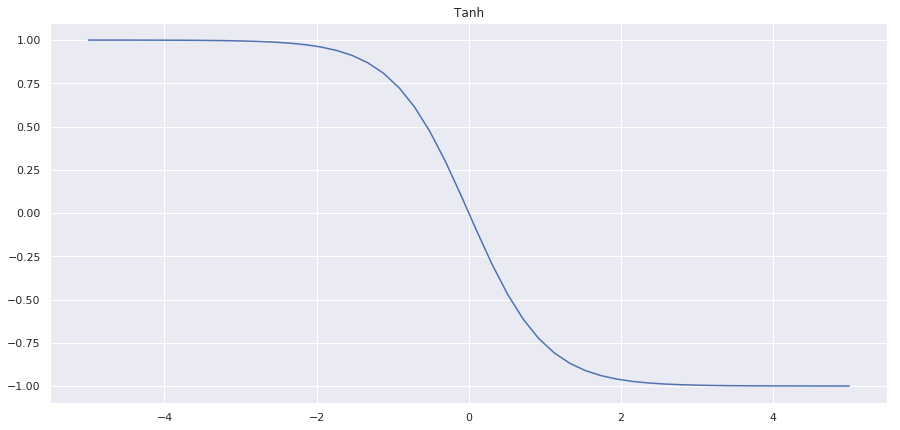

In [14]:
x = np.linspace(-5, 5); y = np.tanh(-x)

plt.plot(x,y); plt.title('Tanh'); plt.show()

# Activation Function (ReLU)
* Rectified Linear Unit   

\begin{equation}
    \phi (z) = max(0, z)
\end{equation}

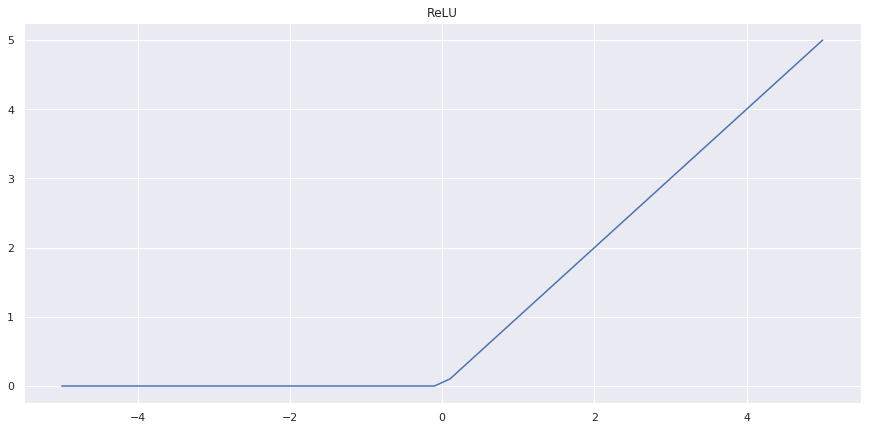

In [15]:
x = np.linspace(-5, 5); y = np.maximum(0,x)

plt.plot(x,y); plt.title('ReLU'); plt.show()

# ReLU
**Good**
* Does not saturate (in positive region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
* Actually more biologically plausible than sigmoid  

**Bad**
* Not zero-centered output
* Gradient when $x < 0$ is 0

# Activation Function (Leaky ReLU)
\begin{equation}
    \phi (z) = max(\alpha z, z)
\end{equation}

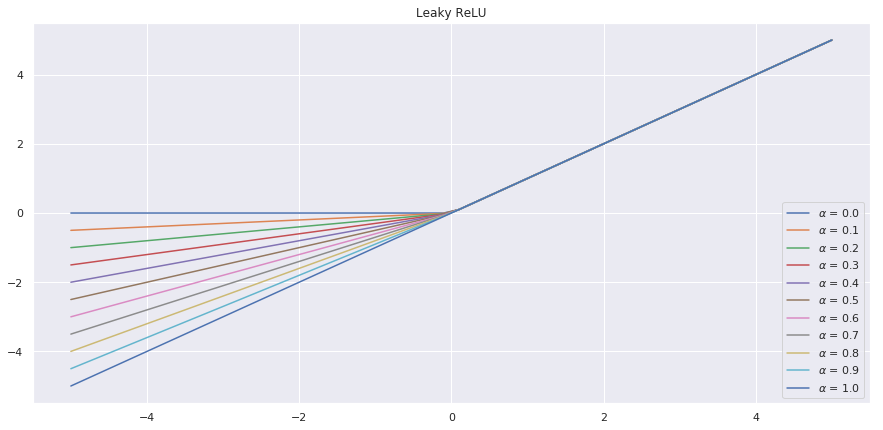

In [16]:
for alpha in np.linspace(0, 1, 11):
    x = np.linspace(-5, 5); y = np.maximum(alpha*x,x)
    plt.plot(x,y, label='$\\alpha$ = ' + str(round(alpha,1)))
plt.legend(); plt.title('Leaky ReLU'); plt.show()

* Does not saturate
- Computationally efficient
- Converges much faster than
sigmoid/tanh in practice! (e.g. 6x)
- will not “die”.

# Learning
* We want to update weights to minimize error

* This was easy with one layer
    * Targets are immediately available

* With many layers we must pass the error backwards
    * Backpropagation

# Forward Pass

\begin{equation}
    Z^{(1)} = X^{(1)} \theta^{(1)} 
\end{equation}

\begin{equation}
    X^{(2)} = \phi_1 ( Z^{(1)} )
\end{equation}

\begin{equation}
    Z^{(2)} = X^{(2)} \theta^{(2)} 
\end{equation}

\begin{equation}
    \hat{Y} = \phi_2 ( Z^{(2)} )
\end{equation} 

# Backpropagation

\begin{equation}
    J(\theta) = \frac{1}{2}( Y - \hat{Y} )^2
\end{equation} 

\begin{equation}
   \frac{\partial J}{\partial \theta^{(2)}} = \frac{\partial J}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{(2)}} \frac{\partial Z^{(2)}}{\partial \theta^{(2)}} = (Y-\hat{Y}) \phi_2'(Z^{(2)}) X^{(2)}
\end{equation}

\begin{equation}
    \frac{\partial J}{\partial \theta^{(1)}} = \frac{\partial J}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{(2)}} \frac{\partial Z^{(2)}}{\partial X^{(2)}} \frac{\partial X^{(2)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial \theta^{(1)}}
\end{equation} 

\begin{equation} 
    = (Y-\hat{Y}) \phi_2'(Z^{(2)}) \theta^{(2)} \phi_1'(Z^{(1)}) X^1
\end{equation} 

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

# Keras

<img src="https://cdn-images-1.medium.com/max/1600/1*OxAgYCBDKyXYLiWWUoKUcQ.png">

# Imports

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


# Set parameters

In [18]:
# 128 images in each batch
batch_size = 128
# 0-9 numbered images
num_classes = 10
# train for 20 steps
epochs = 5

# Load the data

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<img src="https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067">

# Formatting

In [20]:
# flatten the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the data to be between 0 and 1
x_train /= 255.
x_test /= 255.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 'train samples')
(10000, 'test samples')


# Create the model

In [21]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Plotting the model

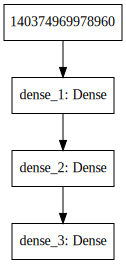

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Training

In [23]:
history = model.fit(
    x_train, y_train, # training data to learn from 
    batch_size=batch_size, # size of batches
    epochs=epochs, # how many iterations we train for 
    verbose=1, # type of logging
    validation_data=(x_test, y_test)) # validation data to test on

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 1.0882 - acc: 0.7672 - val_loss: 0.5197 - val_acc: 0.8760
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4462 - acc: 0.8831 - val_loss: 0.3696 - val_acc: 0.9041
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3573 - acc: 0.9019 - val_loss: 0.3191 - val_acc: 0.9131
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3171 - acc: 0.9116 - val_loss: 0.2905 - val_acc: 0.9189
Epoch 5/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.2915 - acc: 0.9180 - val_loss: 0.2703 - val_acc: 0.9246


# Plotting Results

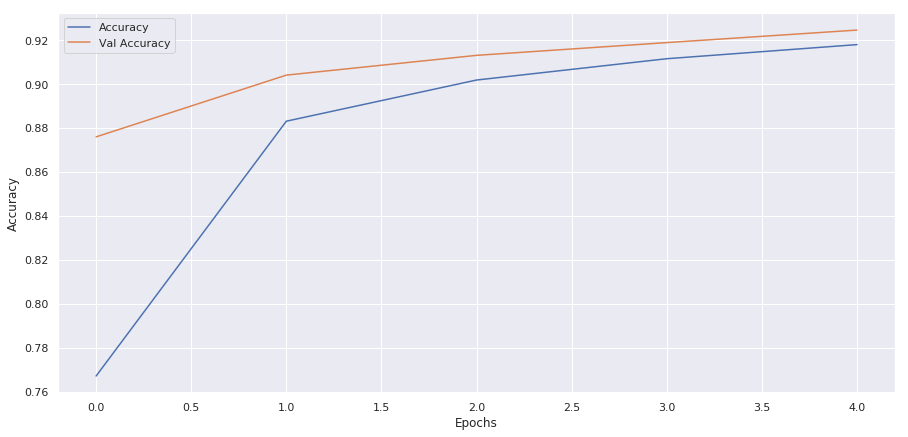

In [24]:
history.history['epochs'] = range(epochs)

sns.lineplot(x='epochs', y='acc', data=history.history, label='Accuracy')
sns.lineplot(x='epochs', y='val_acc', data=history.history, label='Val Accuracy')

plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

# References
[Code and detailed examples](https://github.com/jordanott/CPSC392/blob/master/Notebooks/Neural%20Networks.ipynb)